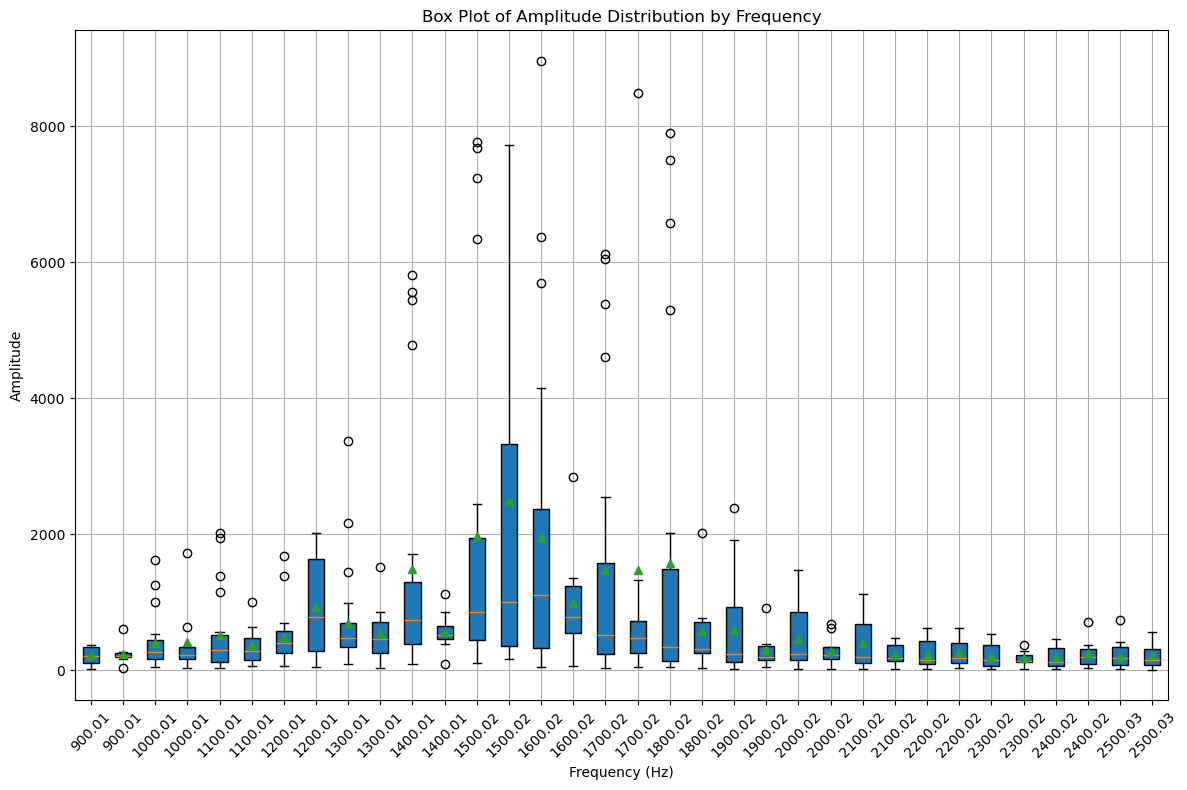

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# 주파수 구간 설정 (예: 0 ~ 500 Hz)
min_freq = 1600 - 700  # 최소 주파수
max_freq = 1600 + 1000  # 최대 주파수

# 현재 디렉토리에서 모든 .txt 파일 찾기
file_paths = glob.glob('*.txt')

# 주파수와 FFT 값을 저장할 딕셔너리
frequency_dict = {}

for file_path in file_paths:
    # 데이터 파일에서 헤더를 건너뛰고 데이터를 로드
    data = pd.read_csv(file_path, skiprows=8, header=None)
    
    # 첫 번째 열은 시간, 두 번째 열은 진폭으로 가정
    time = data.iloc[:, 0]
    amplitude = data.iloc[:, 1]

    # FFT 수행
    n = len(amplitude)  # 데이터 포인트 수
    dt = time[1] - time[0]  # 시간 간격 (균일한 간격 가정)
    frequencies = np.fft.fftfreq(n, d=dt)
    fft_values = np.fft.fft(amplitude)

    # 양수 주파수와 해당하는 FFT 값만 유지
    positive_frequencies = frequencies[:n // 2]
    positive_fft_values = np.abs(fft_values[:n // 2])

    # 주파수 구간 필터링
    mask = (positive_frequencies >= min_freq) & (positive_frequencies <= max_freq)
    filtered_frequencies = positive_frequencies[mask]
    filtered_fft_values = positive_fft_values[mask]

    # 각 주파수에 대해 값을 저장
    for freq, amp in zip(filtered_frequencies, filtered_fft_values):
        if freq not in frequency_dict:
            frequency_dict[freq] = []
        frequency_dict[freq].append(amp)

# 주파수와 대응하는 진폭 값을 추출하여 박스 플롯 생성
plt.figure(figsize=(12, 8))
plt.boxplot([frequency_dict[freq] for freq in sorted(frequency_dict.keys())], 
            patch_artist=True, showmeans=True)

# x축에 주파수 라벨 추가
plt.xticks(ticks=range(1, len(frequency_dict) + 1), labels=[f'{freq:.2f}' for freq in sorted(frequency_dict.keys())], rotation=45)

# 플롯 설정
plt.title("Box Plot of Amplitude Distribution by Frequency")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()
